# 2.6. Probability

## 2.6.1. Basic Probability Theory

In [0]:
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fair_probs = torch.tensor([1.0/6]*6)
print(fair_probs)
print(Multinomial(1,fair_probs).sample())
print(Multinomial(10,fair_probs).sample())

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
tensor([1., 0., 0., 0., 0., 0.])
tensor([1., 0., 3., 3., 2., 1.])


6가지 경우가 모두 1/6의 확률을 가지도록 하여 Multinomial을 이용하여 1번 시행을 한 경우 6가지 중 하나가 나오게 될 것입니다. 1을 10으로 바꾸면 10번 시행을 하여 각각의 경우가 나온 수를 .sample()을 이용해 출력해 줍니다.

In [3]:
num_tosses = 10
counts = Multinomial(num_tosses,fair_probs).sample()
counts/num_tosses

tensor([0.3000, 0.1000, 0.1000, 0.4000, 0.1000, 0.0000])

10번 시행하여 시행횟수로 나누어 확률을 구해보았습니다.


In [4]:
num_tosses = 10000
counts = Multinomial(num_tosses,fair_probs).sample()
counts/num_tosses

tensor([0.1765, 0.1601, 0.1616, 0.1752, 0.1603, 0.1663])

10000번 시행하여 시행횟수로 나누어 확률을 구해보았습니다.



In [0]:
num_tosses = 1000
tosses = Multinomial(1,fair_probs)
counts = torch.zeros(6,num_tosses,dtype=torch.float32)
totals = torch.zeros(6,)
for i in range(num_tosses):
  totals += tosses.sample()
  counts[:,i] = totals

시행이 늘어나면서 각각의 경우에 대한 확률이 어떻게 변하는 지 살펴보기 위해 counts에 매 시행마다 결과가 누적되도록 하였습니다.

In [6]:
totals

tensor([137., 175., 169., 176., 163., 180.])

In [7]:
counts

tensor([[  0.,   1.,   1.,  ..., 137., 137., 137.],
        [  0.,   0.,   1.,  ..., 175., 175., 175.],
        [  0.,   0.,   0.,  ..., 169., 169., 169.],
        [  0.,   0.,   0.,  ..., 176., 176., 176.],
        [  0.,   0.,   0.,  ..., 162., 163., 163.],
        [  1.,   1.,   1.,  ..., 179., 179., 180.]])

In [8]:
x = torch.arange(num_tosses, dtype=torch.float32).reshape((1,num_tosses)) + 1
estimates = counts/x
print(estimates[:,0])
print(estimates[:,2])
print(estimates[:,10])
print(estimates[:,100])

tensor([0., 0., 0., 0., 0., 1.])
tensor([0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.3333])
tensor([0.1818, 0.0909, 0.2727, 0.0000, 0.0909, 0.3636])
tensor([0.1584, 0.1881, 0.1485, 0.1683, 0.1683, 0.1683])


counts를 시행수로 나누어주어 확률을 계산합니다.

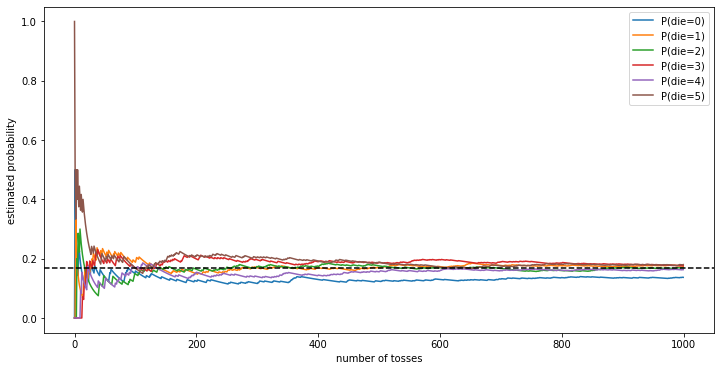

In [9]:
plt.figure(figsize=(12,6))
for i in range(6):
  plt.plot(estimates[i,:].numpy(),label=("P(die="+str(i)+")"))
plt.axhline(y=0.167,color='black',linestyle='dashed')
plt.legend()
plt.xlabel('number of tosses')
plt.ylabel('estimated probability')
plt.show()